In [1]:
import os
import shutil
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np

This notebook is meant to assist creating the SENT-NICFI dataset. In particular, candidate sentinel images are inspected (in some cases there are more than 1 per NICFI tile) and the best ones are chosen. Finally, there is also some file cleanup (removing NICFI /sentinel tiles that did not end up in the dataset)

In [2]:
tile_ids = ["1183-869",
            "1269-1090",
            "1200-920",
            "978-1096",
            "1137-956",
            "1075-1128",
            "1304-1079",
            "1110-882",
            "1208-1129",
            "1032-1107",
            "1134-1020",
            "1102-1028",
            "1013-1053",
            "1304-935",
            "1176-1016",
            "1253-938",
            "943-1098",
            "1056-1076",
            "1171-946",
            "1282-1037",
            "1235-1016",
            "1203-977",
            "1288-931",
            "1245-1109",
            "1128-953",
            "1149-1085",
            "1019-1090",
            "982-1096",
            "1188-895",
            "1005-1089"]
DATADIR="/data/s1620444/automl/datasets"
DATASETSDIR="/data/s1620444/automl/datasets/tfds"
RESULTSDIR="/data/s1620444/automl/results"
SENTDIR="/data/s1620444/automl/datasets/sent_nicfi/sent"

In [3]:
# get the filepaths to candidate sentinel tiles
sent = []
for tile in tile_ids:
    with open(os.path.join(SENTDIR, tile,"online_files.txt"),"r") as f:
        lines=f.readlines()
        sent.append([line.strip() for line in lines])

1183-869


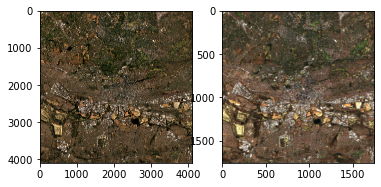

1269-1090


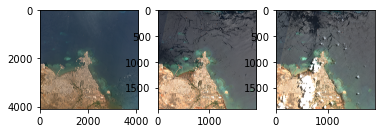

1200-920


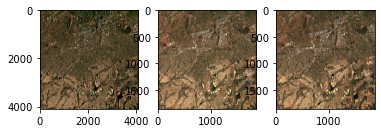

978-1096


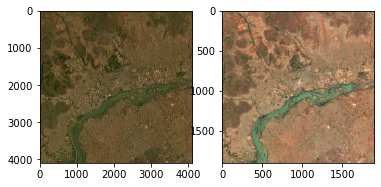

1137-956


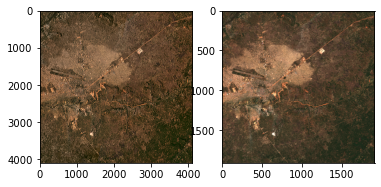

1075-1128


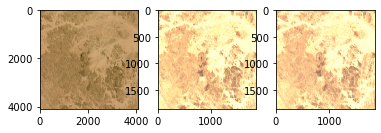

1304-1079


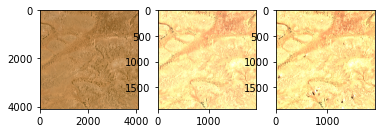

1110-882


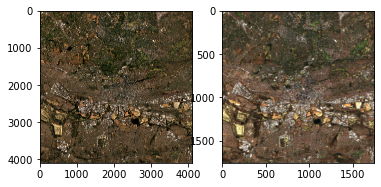

1208-1129


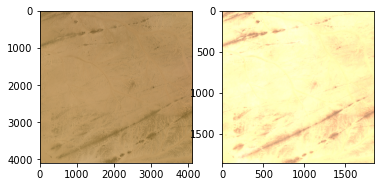

1032-1107


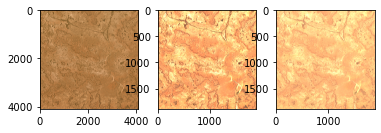

1134-1020


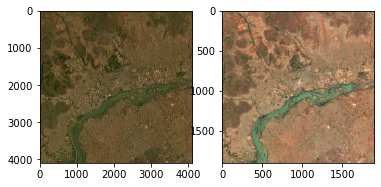

1102-1028


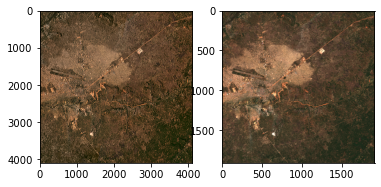

1013-1053


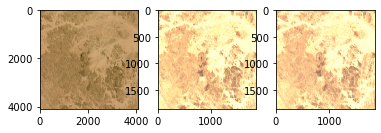

1304-935


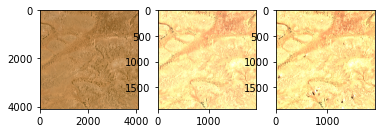

1176-1016


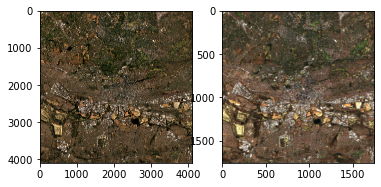

1253-938


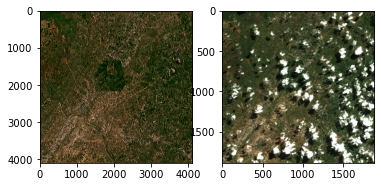

943-1098


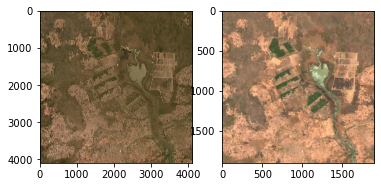

1056-1076


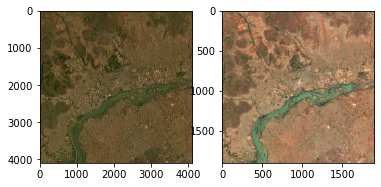

1171-946


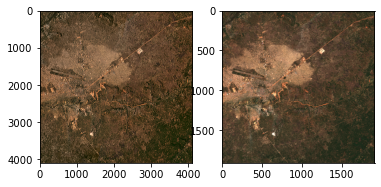

1282-1037


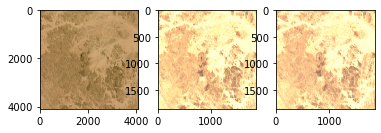

1235-1016


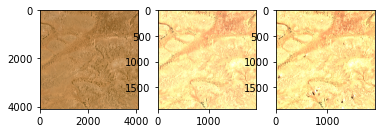

1203-977


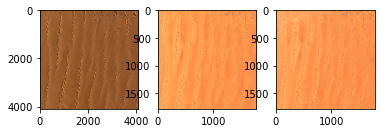

1288-931


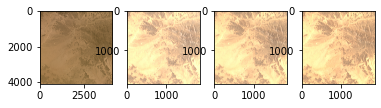

1245-1109


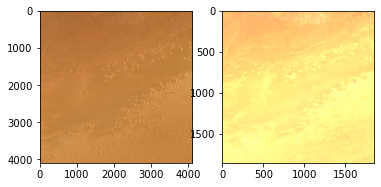

1128-953


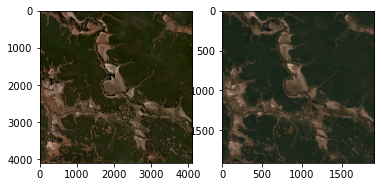

1149-1085


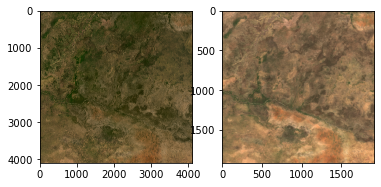

1019-1090


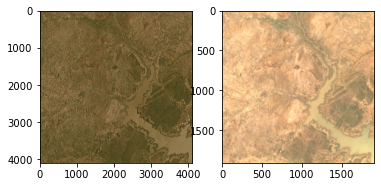

982-1096


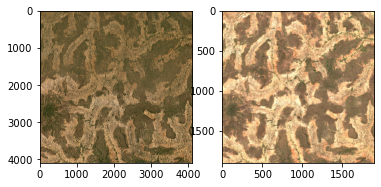

1188-895


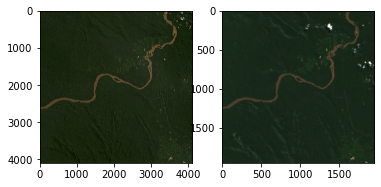

1005-1089


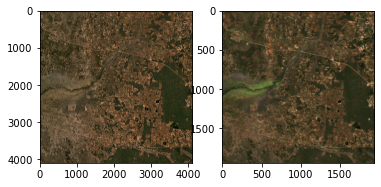

In [8]:
# print sentinel tiles along with nicfi tiles for inspection

for i, nicfi in enumerate(tile_ids): 
    num_sent = len(sent[i])
    fig, ax = plt.subplots(1,num_sent+1)
    nicfi_img = gdal.Open(f"/data/s1620444/automl/datasets/sent_nicfi/nicfi/original/{nicfi}.tif").ReadAsArray()

    ax[0].imshow(np.moveaxis(nicfi_img, 0, -1))
    for k in range(num_sent):
        img = gdal.Open(sent[i][k]).ReadAsArray()
        ax[k+1].imshow(np.moveaxis(img, 0,-1))
        plt.title(nicfi)
    plt.show()


In [9]:
# select sentinel tiles to keep
sent_keep=[tiles[0] for tiles in sent]

['/data/s1620444/automl/datasets/sent_nicfi/sent/tmp/2021-06-06-TCI-10m-87be17d6aca0472384c93855daa5ee24.tiff',
 '/data/s1620444/automl/datasets/sent_nicfi/sent/tmp/2021-06-01-TCI-10m-035825856a954117afc8b3d20eab65ac.tiff',
 '/data/s1620444/automl/datasets/sent_nicfi/sent/tmp/2021-06-01-TCI-10m-7b42014112fc4c96ab9a57c205e75b92.tiff',
 '/data/s1620444/automl/datasets/sent_nicfi/sent/tmp/2021-06-01-TCI-10m-12096884fa334541b50748aa28fadb0f.tiff',
 '/data/s1620444/automl/datasets/sent_nicfi/sent/tmp/2021-06-01-TCI-10m-e72e4d8685bc4240826dbcc7e911f525.tiff',
 '/data/s1620444/automl/datasets/sent_nicfi/sent/tmp/2021-06-01-TCI-10m-8c50bdd922e54230907e2544be82a7d7.tiff',
 '/data/s1620444/automl/datasets/sent_nicfi/sent/tmp/2021-06-01-TCI-10m-0138bd751b544383b3f4e344731823c7.tiff',
 '/data/s1620444/automl/datasets/sent_nicfi/sent/tmp/2021-06-06-TCI-10m-c6cfdecf5c5041d88f749fc44d6ea194.tiff',
 '/data/s1620444/automl/datasets/sent_nicfi/sent/tmp/2021-06-06-TCI-10m-ce82266fb2b544ad9983a655340e840a

In [10]:
# src_dir=os.getcwd()
# copy chosen sent images to dest folder
dest_dir="/data/s1620444/automl/datasets/sent_nicfi/sent/original"
for i, sent_path in enumerate(sent_keep):
    shutil.copy(sent_path,dest_dir)
    dest_file=os.path.join(dest_dir,os.path.basename(sent_path))
    os.rename(dest_file, os.path.join(dest_dir,tile_ids[i]+".tif"))

In [19]:
# removed unused nicfi
source_dir="/data/s1620444/automl/datasets/sent_nicfi/nicfi/original"
for file in os.listdir(source_dir):
    if file.endswith("tif"):
        id =file.split(".")[0]
        if "info" not in id and id not in tile_ids:
            os.remove(os.path.join(source_dir,id+".tif"))
            os.remove(os.path.join(source_dir,id+"_info.txt"))